In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()

import numpy as np

In [22]:
def show_heatmaps(df, x, y, z, vmin=0.85, vmax=0.9):
    z_vals = df[z].unique()

    for z_val in z_vals:
        selection = df[df[z] == z_val]

        print('{}: {}'.format(z, z_val))
        print(selection[[x, y, 'val_score']].head())

        # flights = sns.load_dataset(selection)
        selection = selection.pivot(x, y, 'val_score')

        plt.figure()
        ax = sns.heatmap(selection, vmin=vmin, vmax=vmax)
        plt.show()

In [30]:
def linear(x):
    return x

In [31]:
def show_3d_heatmap(df, x, y, z, x_scale=linear, y_scale=linear, z_scale=linear):
    fig = plt.figure()

    ax = plt.axes(projection='3d')

    # Data for three-dimensional scattered points
    xs = x_scale(df[x].values)
    ys = y_scale(df[y].values)
    zs = z_scale(df[z].values)
    scores = df['val_score'].values
    scatterplot = ax.scatter3D(xs, ys, zs, c=scores, cmap='Reds')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

    cbar = ax.figure.colorbar(scatterplot, ax=ax, cmap="Reds")
    cbar.ax.set_ylabel('Validation Score', rotation=-90, va="bottom")

## Degree 4

In [23]:
opu_degree_4 = pd.read_csv('csv/FashionMNIST_sim_opu_4.csv')

In [24]:
opu_degree_4.sort_values(by='val_score', ascending=False)[:20]

,alpha,bias,degree,num_features,proj_time,projection,regr_time,scale,test_score,val_score
96,100.000000,4.0,4.0,10000.0,0.251411,opu,1.777897,0.00010,0.8816,0.889500
117,1000.000000,4.0,4.0,10000.0,0.184046,opu,1.714413,0.00100,0.8794,0.888083
83,100.000000,0.0,4.0,10000.0,0.193594,opu,1.746989,0.01000,0.8758,0.888083
13,0.000001,2.0,4.0,10000.0,0.187638,opu,1.778550,0.01000,0.8764,0.887917
93,100.000000,2.0,4.0,10000.0,0.253902,opu,1.748746,0.01000,0.8784,0.887833
28,0.100000,1.0,4.0,10000.0,0.184762,opu,1.655020,0.01000,0.8760,0.887167
87,100.000000,1.0,4.0,10000.0,0.193591,opu,1.747054,0.00100,0.8783,0.887083
40,1.000000,0.0,4.0,10000.0,0.195691,opu,1.738046,0.00001,0.8769,0.887000
91,100.000000,2.0,4.0,10000.0,0.182637,opu,1.746642,0.00010,0.8801,0.887000
24,0.100000,0.0,4.0,10000.0,0.334739,opu,1.778865,0.10000,0.8776,0.886750


bias: 0.0
     scale     alpha  val_score
0  0.00001  0.000001   0.884583
1  0.00010  0.000001   0.883167
2  0.00100  0.000001   0.879167
3  0.01000  0.000001   0.884000
4  0.10000  0.000001   0.883417


<IPython.core.display.Javascript object>


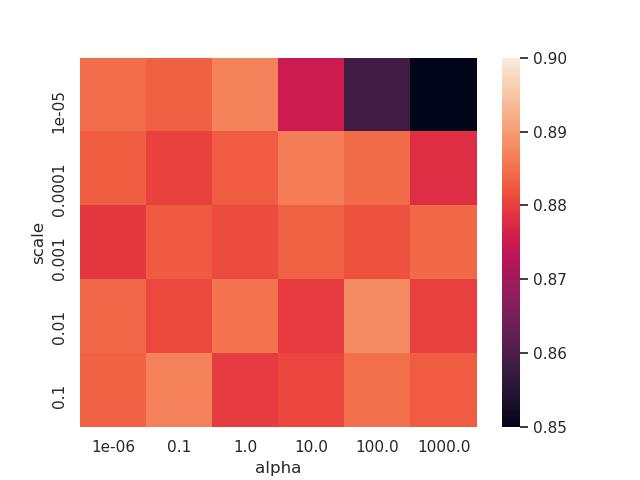

bias: 1.0
     scale     alpha  val_score
5  0.00001  0.000001   0.880500
6  0.00010  0.000001   0.882583
7  0.00100  0.000001   0.885333
8  0.01000  0.000001   0.885000
9  0.10000  0.000001   0.884583


<IPython.core.display.Javascript object>


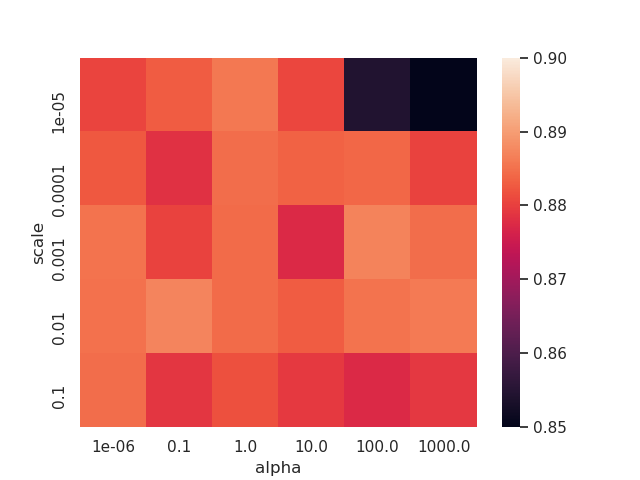

bias: 2.0
      scale     alpha  val_score
10  0.00001  0.000001   0.882500
11  0.00010  0.000001   0.885250
12  0.00100  0.000001   0.880167
13  0.01000  0.000001   0.887917
14  0.10000  0.000001   0.886750


<IPython.core.display.Javascript object>


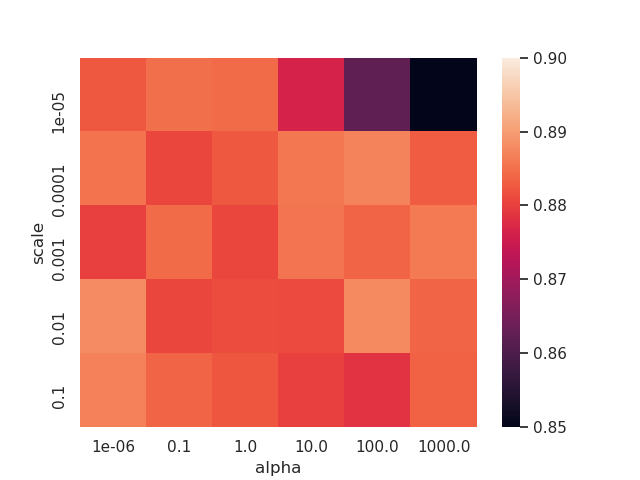

bias: 4.0
      scale     alpha  val_score
15  0.00001  0.000001   0.886167
16  0.00010  0.000001   0.883500
17  0.00100  0.000001   0.880667
18  0.01000  0.000001   0.883583
19  0.10000  0.000001   0.879083


<IPython.core.display.Javascript object>


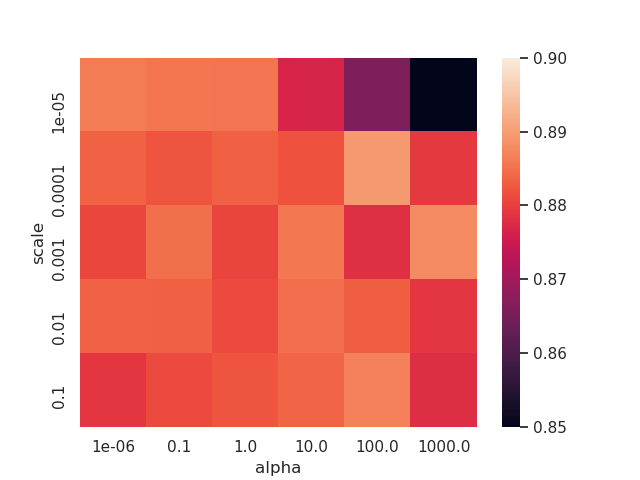

In [25]:
show_heatmaps(opu_degree_4, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)

<IPython.core.display.Javascript object>


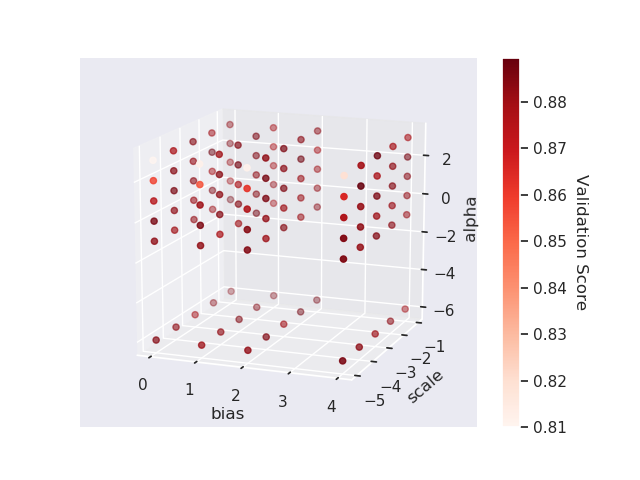

In [33]:
show_3d_heatmap(opu_degree_4, 'bias', 'scale', 'alpha', y_scale=np.log10, z_scale=np.log10)